# Import necessary libraries

In [1]:
import json
import nltk

!pip install nlp_utils
import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random

from collections import Counter

import string
string.punctuation
!pip install langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#nltk.download('punkt')
#nltk.download('stopwords')

!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import os

In [3]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
# Train data

In [5]:
train_spam = pd.read_csv("./train_spam_data.csv")
train_spam

,Description,Spam
0,Subject: here send own bulk email\n\nwebsite t...,yes
1,Subject: become + certified pc technicium\n\nb...,yes
2,Subject: list software worldwide\n\norder form...,yes
3,Subject: hi !\n\n* * * is spam ! * * * name ma...,yes
4,Subject: incredible opportunity\n\ndear friend...,yes
...,...,...
346,"Subject: scary ! ! !\n\nthirst ! television "" ...",yes
347,"Subject: . . . . . . speedracer , . . . . . sp...",yes
348,Subject: personal message . . . . .\n\nplace a...,yes
349,Subject: hello . .\n\nreally blast . movie = v...,yes


In [6]:
train_not_spam  = pd.read_csv('./train_not_spam_data.csv')
train_not_spam

,Description,Spam
0,Subject: latex macintosh\n\n' ve already mind ...,no
1,Subject: obituary : jochem schindler\n\ninform...,no
2,"Subject: re : 6 . 793 , qs : mohawk , russian ...",no
3,Subject: job opening\n\njob opening re - post ...,no
4,Subject: dislocation\n\ncontent - length : 440...,no
...,...,...
346,Subject: word own opposite ( part 2 )\n\nsumma...,no
347,Subject: sum : ' ' ' '\n\ndear colleague : wee...,no
348,Subject: n-ary comparison\n\n( 1 ) strongly su...,no
349,Subject: available review\n\nbook list below l...,no


In [7]:
# Concatenate the dataframes vertically
train_df = pd.concat([train_spam, train_not_spam], ignore_index=True)
train_df

,Description,Spam
0,Subject: here send own bulk email\n\nwebsite t...,yes
1,Subject: become + certified pc technicium\n\nb...,yes
2,Subject: list software worldwide\n\norder form...,yes
3,Subject: hi !\n\n* * * is spam ! * * * name ma...,yes
4,Subject: incredible opportunity\n\ndear friend...,yes
...,...,...
697,Subject: word own opposite ( part 2 )\n\nsumma...,no
698,Subject: sum : ' ' ' '\n\ndear colleague : wee...,no
699,Subject: n-ary comparison\n\n( 1 ) strongly su...,no
700,Subject: available review\n\nbook list below l...,no


In [8]:
val_spam = pd.read_csv('./test_spam_data.csv')
val_spam

,Description,Spam
0,Subject: http : / / www . xxxnet . cx\n\nmost ...,yes
1,Subject: < < through 's body & mind > >\n\n= =...,yes
2,"Subject: adv : y2k . . . pristine , remote wil...",yes
3,Subject: pay us visit . ( adult ) # 3cde\n\n1b...,yes
4,Subject: hello\n\nuniversity degree programs i...,yes
...,...,...
125,"Subject: offer close march 31 , 1999\n\noffer ...",yes
126,Subject: win free trip antigua\n\nwin free tri...,yes
127,Subject: xenical - fat blocking drug approve f...,yes
128,Subject: webmine\n\nfree white paper datum min...,yes


In [9]:
val_not_spam = pd.read_csv('./test_not_spam_data.csv')
val_not_spam

,Description,Spam
0,Subject: computer assist learn french ( specia...,no
1,Subject: pkdd ' 98\n\npkdd ' 98 - - 2nd europe...,no
2,Subject: workshop analogy\n\nworkshop advance ...,no
3,Subject: endanger language workshop\n\nfoundat...,no
4,Subject: language resource & evaluation worksh...,no
...,...,...
125,Subject: french grad student conference\n\napp...,no
126,Subject: book : syntax\n\nsusanne winkler focu...,no
127,Subject: sociolinguistic symposium 12 update\n...,no
128,Subject: comparative romance linguistic - mla ...,no


In [10]:
# Concatenate the dataframes vertically
val_df = pd.concat([val_spam, val_not_spam], ignore_index=True)
val_df

,Description,Spam
0,Subject: http : / / www . xxxnet . cx\n\nmost ...,yes
1,Subject: < < through 's body & mind > >\n\n= =...,yes
2,"Subject: adv : y2k . . . pristine , remote wil...",yes
3,Subject: pay us visit . ( adult ) # 3cde\n\n1b...,yes
4,Subject: hello\n\nuniversity degree programs i...,yes
...,...,...
255,Subject: french grad student conference\n\napp...,no
256,Subject: book : syntax\n\nsusanne winkler focu...,no
257,Subject: sociolinguistic symposium 12 update\n...,no
258,Subject: comparative romance linguistic - mla ...,no


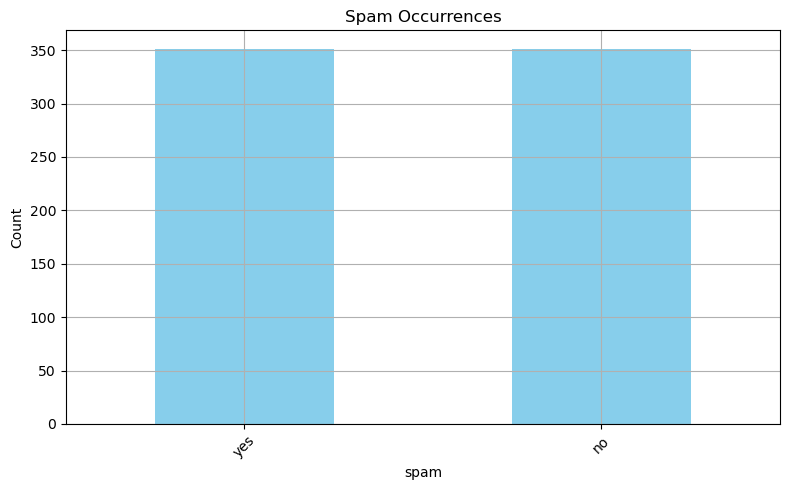

In [11]:
# Count the occurrences of each emotion
emotion_counts = train_df['Spam'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Spam Occurrences')
plt.xlabel('spam')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

In [12]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/sysadm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

In [14]:
import string
alphabets = list(string.ascii_lowercase)
alphabets 

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [15]:
import re

def remove_numeric_sequences_and_ordinals(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    return text

def remove_puntuations(txt):
    punct = set(string.punctuation)
    txt = " ".join(txt.split("."))
    txt = " ".join(txt.split("!"))
    txt = " ".join(txt.split("?"))
    txt = " ".join(txt.split(":"))
    txt = " ".join(txt.split(";"))
    
    txt = "".join(ch for ch in txt if ch not in punct)
    return txt


# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    #remove numeric and ordinals 
    text = remove_numeric_sequences_and_ordinals(text)

    # Remove punctuation
    text = remove_puntuations(text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in list(total_stop_words) + ["subject"] + alphabets and word.isalpha()])

    return text

In [16]:
#check for one document
text_1 = train_df["Description"][1]

In [17]:
preprocess_text(text_1)

'become certified pc technicium bureau labor statistic estimate computer relate employment jump nationally increase mean shortage skill personnel fast grow high tech industry recent report news confirm shortage whether season information specialist consider career plus certification benchmark ticket information age become certify bring threshold industry poise skyrocket next plus certification non vendor novell microsoft specific certification verify competency computer repair professional two exam first hardware motherboard ram chip etc os specialty mac dos win upon completion able earn far higher wage certify goal mountain micro help step door information age confident qualify certify professional greater leverage career certification course page text two cbt cdrom checkit diagnostic software regular price mention ad order accept order three different phone email snail mail phone call order line toll free email send follow order form sale mountainmicro com sure put order snail mail p

In [18]:
# Apply preprocessing to the 'Description' column
train_df['Clean_text'] = train_df['Description'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
train_df

,Description,Spam,Clean_text
0,Subject: here send own bulk email\n\nwebsite t...,yes,send bulk email website teach bulk email produ...
1,Subject: become + certified pc technicium\n\nb...,yes,become certified pc technicium bureau labor st...
2,Subject: list software worldwide\n\norder form...,yes,list software worldwide order form address fre...
3,Subject: hi !\n\n* * * is spam ! * * * name ma...,yes,hi spam name matthew habit delete mail yet rea...
4,Subject: incredible opportunity\n\ndear friend...,yes,incredible opportunity dear friend receive mes...
...,...,...,...
697,Subject: word own opposite ( part 2 )\n\nsumma...,no,word opposite part summary linguist list colle...
698,Subject: sum : ' ' ' '\n\ndear colleague : wee...,no,sum dear colleague week send query list ask fo...
699,Subject: n-ary comparison\n\n( 1 ) strongly su...,no,nary comparison strongly support alexis mr mes...
700,Subject: available review\n\nbook list below l...,no,available review book list linguist office ava...


In [19]:
# Apply preprocessing to the 'Description' column
val_df['Clean_text'] = val_df['Description'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Description,Spam,Clean_text
0,Subject: http : / / www . xxxnet . cx\n\nmost ...,yes,http www xxxnet cx nasty raunchy adult interac...
1,Subject: < < through 's body & mind > >\n\n= =...,yes,body mind clothe ever dream able clothe superm...
2,"Subject: adv : y2k . . . pristine , remote wil...",yes,adv yk pristine remote wilderness acreage perf...
3,Subject: pay us visit . ( adult ) # 3cde\n\n1b...,yes,pay us visit adult cde ba want live cybersex h...
4,Subject: hello\n\nuniversity degree programs i...,yes,hello university degree programs increase pers...
...,...,...,...
255,Subject: french grad student conference\n\napp...,no,french grad student conference appel de commun...
256,Subject: book : syntax\n\nsusanne winkler focu...,no,book syntax susanne winkler focus secondary pr...
257,Subject: sociolinguistic symposium 12 update\n...,no,sociolinguistic symposium update sociolinguist...
258,Subject: comparative romance linguistic - mla ...,no,comparative romance linguistic mla discussion ...


In [20]:
train = train_df[["Spam","Clean_text"]]
train

,Spam,Clean_text
0,yes,send bulk email website teach bulk email produ...
1,yes,become certified pc technicium bureau labor st...
2,yes,list software worldwide order form address fre...
3,yes,hi spam name matthew habit delete mail yet rea...
4,yes,incredible opportunity dear friend receive mes...
...,...,...
697,no,word opposite part summary linguist list colle...
698,no,sum dear colleague week send query list ask fo...
699,no,nary comparison strongly support alexis mr mes...
700,no,available review book list linguist office ava...


In [21]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")

The maximum number of words in an utterance is: 2140


In [22]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")

The index number of the row with the maximum number of words: 283


In [23]:
validation = val_df[["Spam","Clean_text"]]

In [24]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'clean_text' column
unique_words = set(' '.join(train['Clean_text']).split())
sorted_unique_words = sorted(unique_words)
len(sorted_unique_words)

17945

In [25]:
word_to_index = {word: index for index, word in enumerate(sorted_unique_words)}
word_to_index

{'aa': 0,
 'aaa': 1,
 'aaai': 2,
 'aaal': 3,
 'aaarghh': 4,
 'aabb': 5,
 'aag': 6,
 'aaj': 7,
 'aallan': 8,
 'aarbakke': 9,
 'aaret': 10,
 'aarhus': 11,
 'aaron': 12,
 'aart': 13,
 'ab': 14,
 'aba': 15,
 'aback': 16,
 'abajero': 17,
 'abandon': 18,
 'abandonment': 19,
 'abbott': 20,
 'abbreviate': 21,
 'abc': 22,
 'abd': 23,
 'abduction': 24,
 'abductive': 25,
 'abdulfanova': 26,
 'abdulkarim': 27,
 'abe': 28,
 'abed': 29,
 'abeille': 30,
 'abel': 31,
 'abercrombie': 32,
 'abeyta': 33,
 'abhalten': 34,
 'abide': 35,
 'abijggccndoqggwgwayikkpzgaq': 36,
 'ability': 37,
 'abillity': 38,
 'abington': 39,
 'ablaut': 40,
 'able': 41,
 'ablead': 42,
 'abn': 43,
 'aboard': 44,
 'abolish': 45,
 'abolition': 46,
 'aboriginal': 47,
 'aborigine': 48,
 'abot': 49,
 'abound': 50,
 'abovemention': 51,
 'abraham': 52,
 'abramov': 53,
 'abreviatura': 54,
 'abri': 55,
 'abrier': 56,
 'abriter': 57,
 'abroad': 58,
 'abruptly': 59,
 'absence': 60,
 'absent': 61,
 'absolute': 62,
 'absolutely': 63,
 'absol

In [26]:
word_to_index['unknown_word'] = len(word_to_index)
sorted_unique_words.append('unknown_word')

In [27]:
sorted_unique_words[-1]

'unknown_word'

In [28]:
# Function to vectorize the text
def vectorize_text(text, unique_words_list):
    word_to_index = {word: index for index, word in enumerate(unique_words_list)}
    vector = np.zeros(len(unique_words_list))  
    words = text.split()
    for word in words:
        if word in word_to_index:
            vector[word_to_index[word]] += 1
        else:
            vector[-1] += 1  # Increment for unknown words
    return vector

# Creating a dictionary to store the vectors
vectors_dict = {}

for index, row in train.iterrows():
    vectors_dict[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

In [29]:
np.sum(vectors_dict[0])

185.0

In [30]:
# Creating a dictionary to store the vectors
vectors_dict1 = {}

for index, row in validation.iterrows():
    vectors_dict1[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

In [31]:
X_train = np.array(list(vectors_dict.values()))
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
X_validation = np.array(list(vectors_dict1.values()))
X_validation

array([[ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0.,  7.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 82.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0., 73.]])

In [33]:
y_train = train['Spam']
y_train

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
697     no
698     no
699     no
700     no
701     no
Name: Spam, Length: 702, dtype: object

In [34]:
y_validation = validation["Spam"]
y_validation

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
255     no
256     no
257     no
258     no
259     no
Name: Spam, Length: 260, dtype: object

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

# Fit the KNN model

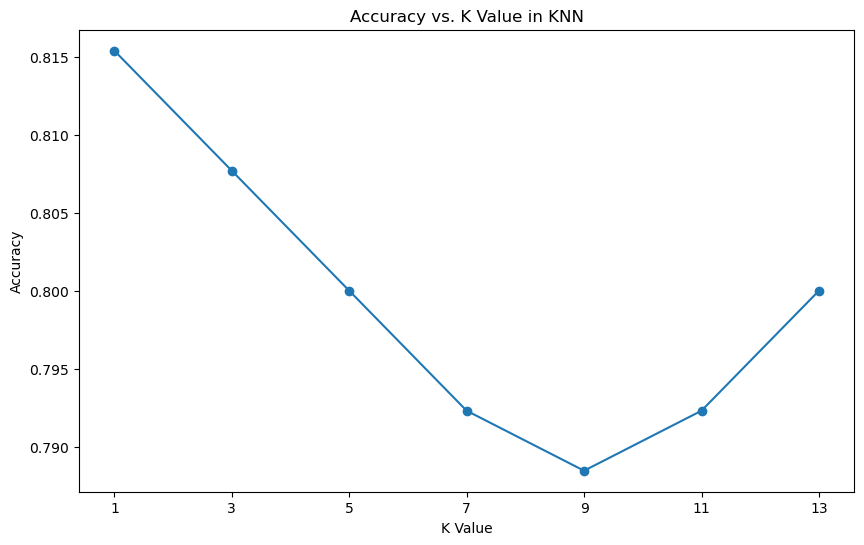

In [36]:
# Define different values of k
k_values = [1, 3, 5, 7, 9, 11,13]
accuracies = []
conf_matrices = []

for k in k_values:
    # Fitting the model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predicting on the validation set
    y_pred_knn = knn_model.predict(X_validation)

    # Calculate the accuracy
    accuracy_knn = accuracy_score(y_validation, y_pred_knn)
    accuracies.append(accuracy_knn)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_validation, y_pred_knn)
    conf_matrices.append(conf_matrix)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [37]:
#Dataframe for K value and accuracy

In [38]:
import pandas as pd

# Printing accuracies for different k values
for i, k in enumerate(k_values):
    print(f"Accuracy for k={k}: {accuracies[i]}")

# Creating a DataFrame for k values and accuracies
data = {'K Value': k_values, 'Accuracy': accuracies}
df_knn = pd.DataFrame(data)
print(df_knn)

Accuracy for k=1: 0.8153846153846154
Accuracy for k=3: 0.8076923076923077
Accuracy for k=5: 0.8
Accuracy for k=7: 0.7923076923076923
Accuracy for k=9: 0.7884615384615384
Accuracy for k=11: 0.7923076923076923
Accuracy for k=13: 0.8
   K Value  Accuracy
0        1  0.815385
1        3  0.807692
2        5  0.800000
3        7  0.792308
4        9  0.788462
5       11  0.792308
6       13  0.800000


In [39]:
Accuracy_compare = df_knn.sort_values(by='Accuracy', ascending=False)
Accuracy_compare

,K Value,Accuracy
0,1,0.815385
1,3,0.807692
2,5,0.800000
6,13,0.800000
3,7,0.792308
5,11,0.792308
4,9,0.788462


In [40]:
# Get the maximum accuracy value
knn_max_accuracy = Accuracy_compare.iloc[0]["Accuracy"]
knn_max_accuracy

0.8153846153846154

In [41]:
# Confusion matrix

In [42]:
# Plotting the confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for k = {k_values[i]}:")
    print(conf_matrix)

Confusion Matrix for k = 1:
[[ 86  44]
 [  4 126]]
Confusion Matrix for k = 3:
[[ 82  48]
 [  2 128]]
Confusion Matrix for k = 5:
[[ 79  51]
 [  1 129]]
Confusion Matrix for k = 7:
[[ 77  53]
 [  1 129]]
Confusion Matrix for k = 9:
[[ 76  54]
 [  1 129]]
Confusion Matrix for k = 11:
[[ 77  53]
 [  1 129]]
Confusion Matrix for k = 13:
[[ 79  51]
 [  1 129]]


# Fit SVM model

In [43]:
#rbf kernal method

In [44]:
# Creating an SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_svm = confusion_matrix(y_validation, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

Confusion Matrix for SVM:
[[129   1]
 [ 31  99]]


In [45]:
from sklearn.metrics import accuracy_score

accuracy_svm_rbf = accuracy_score(y_validation, y_pred_svm)
print(f"Accuracy of the SVM model: {accuracy_svm_rbf}")

Accuracy of the SVM model: 0.8769230769230769


In [46]:
# Creating a linear SVM model
linear_svm_model = SVC(kernel='linear', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
linear_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_linear_svm = linear_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_linear_svm = confusion_matrix(y_validation, y_pred_linear_svm)
print("Confusion Matrix for Linear SVM:")
print(conf_matrix_linear_svm)

# Calculating the accuracy
accuracy_linear_svm = accuracy_score(y_validation, y_pred_linear_svm)
print(f"Accuracy of the Linear SVM model: {accuracy_linear_svm}")

Confusion Matrix for Linear SVM:
[[125   5]
 [  2 128]]
Accuracy of the Linear SVM model: 0.9730769230769231


In [47]:
# Creating a logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fitting the model
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred_logistic = logistic_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_logistic = confusion_matrix(y_validation, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

# Calculating the accuracy
accuracy_logistic = accuracy_score(y_validation, y_pred_logistic)
print(f"Accuracy of the Logistic Regression model: {accuracy_logistic}")

Confusion Matrix for Logistic Regression:
[[125   5]
 [  1 129]]
Accuracy of the Logistic Regression model: 0.9769230769230769


In [48]:
# Naive-bayes

In [49]:
# Creating a Naive Bayes model
naive_bayes_model = MultinomialNB()

# Fitting the model
naive_bayes_model.fit(X_train, y_train)

# Making predictions
y_pred_naive_bayes = naive_bayes_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_naive_bayes = confusion_matrix(y_validation, y_pred_naive_bayes)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_naive_bayes)

# Calculating the accuracy
accuracy_naive_bayes = accuracy_score(y_validation, y_pred_naive_bayes)
print(f"Accuracy of the Naive Bayes model: {accuracy_naive_bayes}")

Confusion Matrix for Naive Bayes:
[[129   1]
 [  3 127]]
Accuracy of the Naive Bayes model: 0.9846153846153847


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Create a Random Forest classi
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_validation)

# Calculate accuracy
accuracy_forest = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy_forest}")

Accuracy: 0.9653846153846154


In [52]:
# Calculating the confusion matrix
conf_matrix_forest = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_forest)

Confusion Matrix for Random Forest:
[[123   7]
 [  2 128]]


#  Model Comparison 

In [53]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Random forest','Naive Bayes','SVM_linear','SVM_rbf','KNN'], 
                        'Accuracy': [accuracy_logistic*100, accuracy_forest *100, accuracy_naive_bayes *100,accuracy_linear_svm *100,accuracy_svm_rbf*100, knn_max_accuracy*100]})
sorted_compare = compare.sort_values(by='Accuracy', ascending=False)
sorted_compare

,Model,Accuracy
2,Naive Bayes,98.461538
0,Logistic Regression,97.692308
3,SVM_linear,97.307692
1,Random forest,96.538462
4,SVM_rbf,87.692308
5,KNN,81.538462


# Best Model

In [54]:
# Get the maximum accuracy value and corresponding model
max_accuracy = sorted_compare.iloc[0]["Accuracy"]
model = sorted_compare.iloc[0]["Model"]
model

'Naive Bayes'

* Thank You